In [ ]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 39.4 MB/s eta 0:00:00


# **Loading Bioactivity data as Smiles pIC50 IC50.**
# **Use KNIME to clean the Chembl data and use non-pain Smiles**
# **(W3 work flow, TeachOpenCADD - a teaching platform for computer-aided drug design using KNIME.)**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Bioactivity_Data_clean.csv')
df

,Smiles,pIC50,IC50
0,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...,4.78,16600.00
1,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,3.81,155000.00
2,N#Cc1ccc2c(c1)CN(S(=O)(=O)c1cccs1)[C@H](Cc1ccc...,5.64,2300.00
3,CCn1c(=O)c(-c2ccc(F)c(NC(=O)Nc3cc(C(C)(C)C)no3...,7.04,91.00
4,CCn1c(=O)c(-c2cc(NC(=O)NCCC(C)(C)C)c(F)cc2C)cc...,6.92,120.00
...,...,...,...
76,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.62,2400.00
77,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.09,8200.00
78,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.68,2100.00
79,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.62,2400.00


# **Labeling Bioactivity Classes**

In [ ]:

# Define the bioactivity class based on IC50
def label_bioactivity(ic50):
    if ic50 < 10000:
        return 'active'
    elif ic50 > 30000:
        return 'inactive'
    else:
        return 'intermediate'

# Apply the function and add the Bioactivity_Class column
df['Bioactivity_Class'] = df['IC50'].apply(label_bioactivity)

# Drop the IC50 column
df.drop('IC50', axis=1, inplace=True)

# Save the updated dataset
df.to_csv('Bioactivity_Data_with_Class.csv', index=False)
df

,Smiles,pIC50,Bioactivity_Class
0,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...,4.78,intermediate
1,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,3.81,inactive
2,N#Cc1ccc2c(c1)CN(S(=O)(=O)c1cccs1)[C@H](Cc1ccc...,5.64,active
3,CCn1c(=O)c(-c2ccc(F)c(NC(=O)Nc3cc(C(C)(C)C)no3...,7.04,active
4,CCn1c(=O)c(-c2cc(NC(=O)NCCC(C)(C)C)c(F)cc2C)cc...,6.92,active
...,...,...,...
76,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.62,active
77,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.09,active
78,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.68,active
79,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.62,active


# **Frequency Plot of Bioactivity Classes**

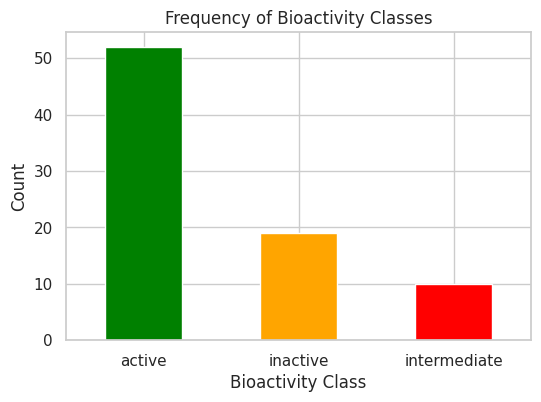

In [ ]:
import matplotlib.pyplot as plt

# Plot the frequency of bioactivity classes
plt.figure(figsize=(6, 4))
df['Bioactivity_Class'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Frequency of Bioactivity Classes')
plt.xlabel('Bioactivity Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('Bioactivity_Class_Frequency.png')
plt.show()


# **FingerPrint & 2D Descriptors & PCA**

# **Steps for Cluster Analysis and Feature Selection**

1. **Standardize Descriptors:** Normalize the descriptors to ensure all features are on the same scale.

2. **Dimensionality Reduction:**

*   Use **Principal Component Analysis (PCA)** to identify key descriptors that explain the variance in the data.
*   Alternatively, apply **t-SNE **or **UMAP** for better visualization in lower dimensions.

3. **Cluster Analysis:**

*   Perform clustering using techniques like **K-Means, Hierarchical Clustering**, or **DBSCAN**.
*   Visualize clusters in reduced dimensionality (e.g., 2D or 3D plots).

4. **Descriptor Importance:**

*   Use feature importance methods such as:

    *   **Correlation Analysis** to check correlation between descriptors and bioactivity classes.
    *   **ANOVA or Kruskal-Wallis H-test** to assess significance of descriptors.
    *   Use feature selection algorithms like **Recursive Feature Elimination (RFE) or SHAP** values to find the most important features.
5. **Visualization:**
* Generate plots to show clusters and descriptor contributions (e.g., heatmaps, bar plots).








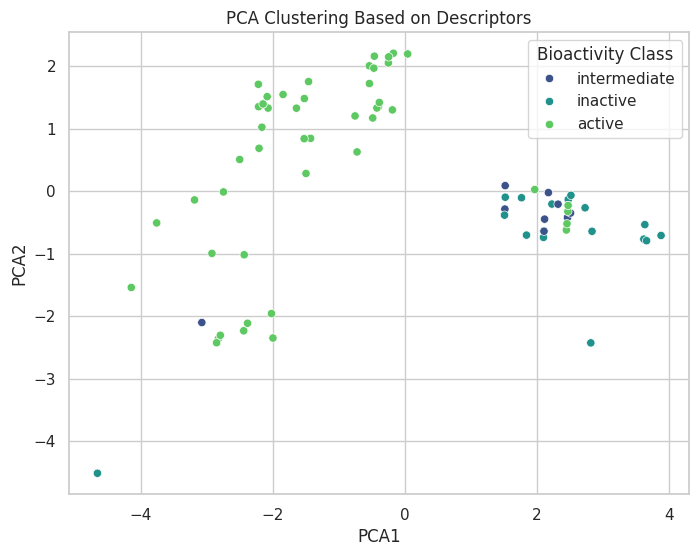

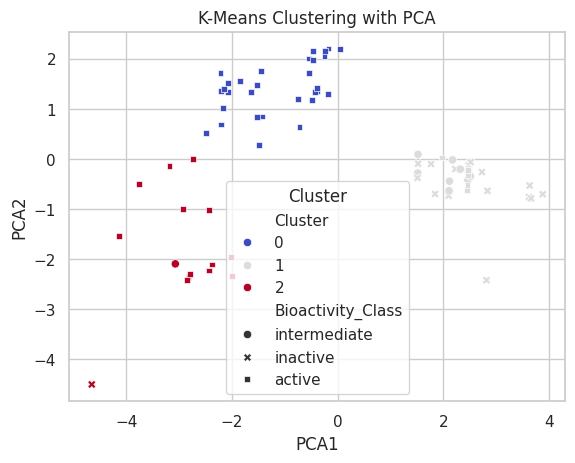

          Descriptor  Importance
4               TPSA        0.40
8    NumHeterocycles        0.33
1               LogP        0.31
5       FractionCSP3        0.28
3         NumHDonors        0.26
0              MolWt        0.23
2      NumHAcceptors        0.16
7   NumAromaticRings        0.16
6  NumRotatableBonds        0.15


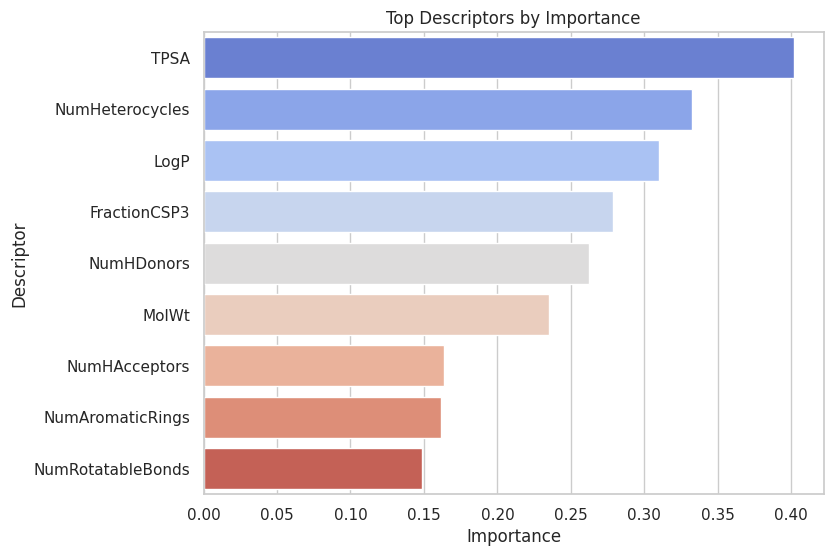

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate descriptors
def calculate_important_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    return {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'TPSA': Descriptors.TPSA(mol),
        'FractionCSP3': Descriptors.FractionCSP3(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol),
        'NumAromaticRings': Descriptors.NumAromaticRings(mol),
        'NumHeterocycles': Descriptors.NumHeterocycles(mol)
    }

# Calculate descriptors for all SMILES
descriptor_data = df['Smiles'].apply(calculate_important_descriptors)
descriptor_df = pd.DataFrame(descriptor_data.tolist())

# Drop compounds with invalid SMILES
descriptor_df.dropna(inplace=True)

# Add Bioactivity_Class back to the descriptor DataFrame
descriptor_df['Bioactivity_Class'] = df['Bioactivity_Class']

# Standardize descriptors
features = descriptor_df.drop(columns=['Bioactivity_Class'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=descriptor_df['Bioactivity_Class'], palette='viridis')
plt.title('PCA Clustering Based on Descriptors')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Bioactivity Class')
plt.show()

# Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
descriptor_df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualize clusters
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=descriptor_df['Cluster'], style=descriptor_df['Bioactivity_Class'], palette='coolwarm')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# Feature Selection: Mutual Information
mutual_info = mutual_info_classif(X_scaled, descriptor_df['Bioactivity_Class'], random_state=42)
feature_importance = pd.DataFrame({
    'Descriptor': features.columns,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Top features
top_features = feature_importance.head(10)
print(top_features)

# Plot top descriptors by importance
plt.figure(figsize=(8, 6))
sns.barplot(data=top_features, x='Importance', y='Descriptor', palette='coolwarm')
plt.title('Top Descriptors by Importance')
plt.show()


In [ ]:
# Add descriptors to the DataFrame
df['descriptors'] = df['Smiles'].apply(calculate_descriptors)

# Convert descriptors to numpy array
X = np.array(df['descriptors'].tolist())
y = df['pIC50'].values

# **Scatter Plot: MW vs LogP**

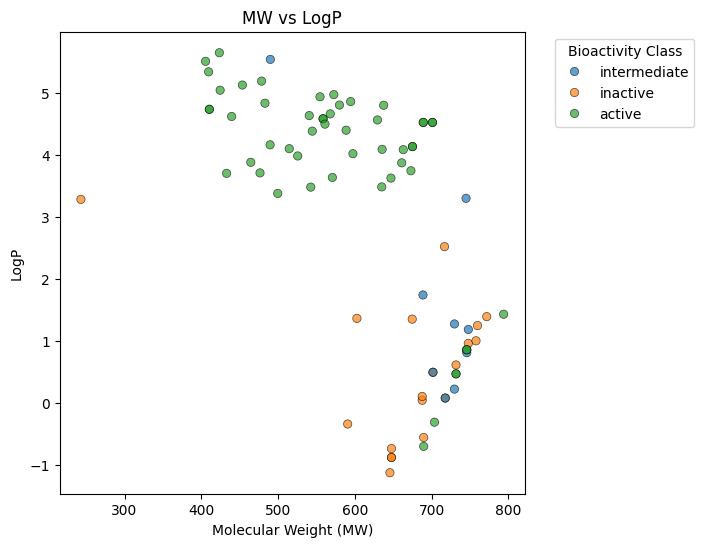

In [ ]:
import seaborn as sns

# Extract relevant descriptors for plotting
df['MW'] = df['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df['LogP'] = df['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df['NumHDonors'] = df['Smiles'].apply(lambda x: Descriptors.NumHDonors(Chem.MolFromSmiles(x)))
df['NumHAcceptors'] = df['Smiles'].apply(lambda x: Descriptors.NumHAcceptors(Chem.MolFromSmiles(x)))

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='MW', y='LogP', hue='Bioactivity_Class', alpha=0.7, edgecolor='black')
plt.title('MW vs LogP')
plt.xlabel('Molecular Weight (MW)')
plt.ylabel('LogP')
plt.legend(title='Bioactivity Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('MW_vs_LogP_Scatter.png')
plt.show()


In [ ]:
df

,Smiles,pIC50,Bioactivity_Class,descriptors,MW,LogP,NumHDonors,NumHAcceptors
0,CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4cc...,4.779892,intermediate,"[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",489.931,5.54420,2,4
1,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,3.809668,inactive,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",243.137,3.28432,2,1
2,N#Cc1ccc2c(c1)CN(S(=O)(=O)c1cccs1)[C@H](Cc1ccc...,5.638272,active,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",489.626,4.16528,1,6
3,CCn1c(=O)c(-c2ccc(F)c(NC(=O)Nc3cc(C(C)(C)C)no3...,7.040959,active,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",478.528,5.19370,3,7
4,CCn1c(=O)c(-c2cc(NC(=O)NCCC(C)(C)C)c(F)cc2C)cc...,6.920819,active,"[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",453.562,5.13032,3,5
...,...,...,...,...,...,...,...,...
76,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.619789,active,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",673.140,3.74672,2,10
77,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.086186,active,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",663.145,4.08732,1,10
78,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.677781,active,"[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...",689.183,4.52692,2,10
79,Cc1cc(N)nc(-c2cc3nc(OC[C@@H]4CCCN4C)nc4c3c(c2C...,5.619789,active,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, ...",701.194,4.52692,2,10


# **Box Plots**

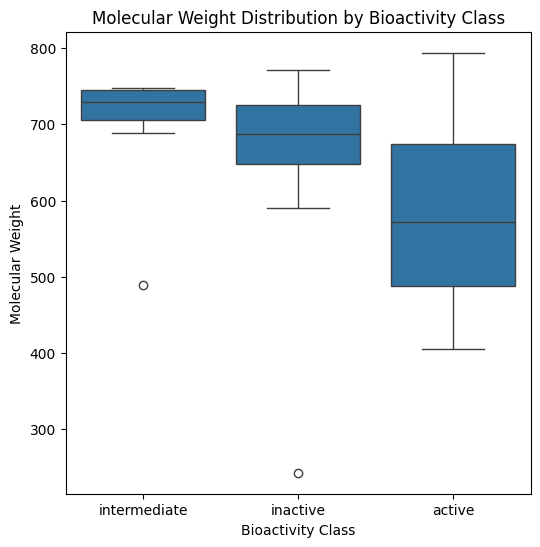

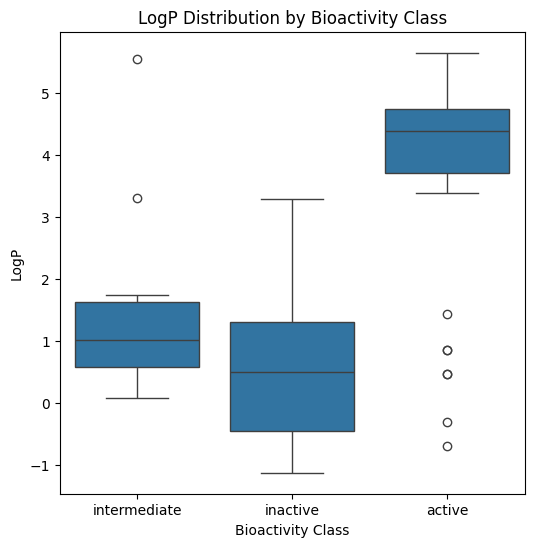

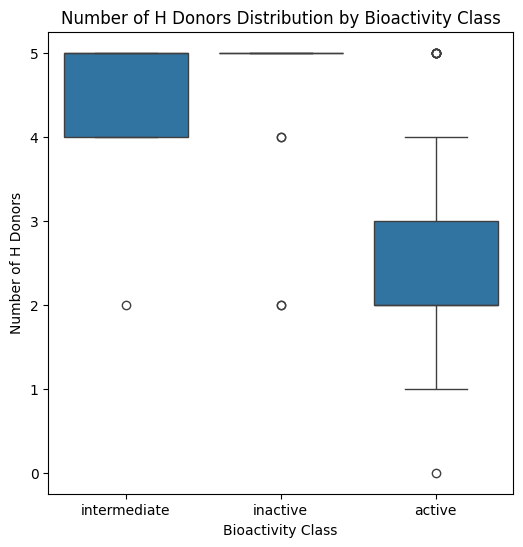

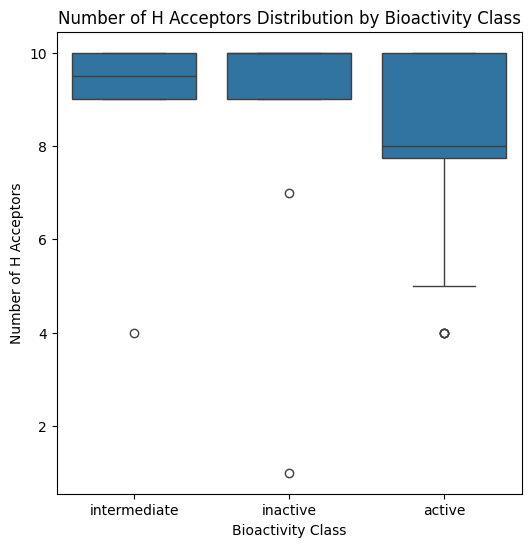

In [ ]:
import seaborn as sns
# Function to create and save boxplots
def create_boxplot(descriptor, ylabel):
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df, x='Bioactivity_Class', y=descriptor)
    plt.title(f'{ylabel} Distribution by Bioactivity Class')
    plt.xlabel('Bioactivity Class')
    plt.ylabel(ylabel)
    plt.savefig(f'{descriptor}_Boxplot.png')
    plt.show()

# Create boxplots for descriptors
create_boxplot('MW', 'Molecular Weight')
create_boxplot('LogP', 'LogP')
create_boxplot('NumHDonors', 'Number of H Donors')
create_boxplot('NumHAcceptors', 'Number of H Acceptors')


# **Statistical Analysis: Mann-Whitney U Test**

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test Function
def mannwhitney(descriptor):
    active = df[df['Bioactivity_Class'] == 'active'][descriptor]
    inactive = df[df['Bioactivity_Class'] == 'inactive'][descriptor]
    stat, p = mannwhitneyu(active, inactive)
    interpretation = 'Same distribution (fail to reject H0)' if p > 0.05 else 'Different distribution (reject H0)'
    return {'Descriptor': descriptor, 'Statistics': stat, 'p': p, 'alpha': 0.05, 'Interpretation': interpretation}

# Analyze descriptors
results = []
for descriptor in ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']:
    results.append(mannwhitney(descriptor))

# Convert results to DataFrame and save
results_df = pd.DataFrame(results)
results_df.to_csv('Mann_Whitney_Results.csv', index=False)

**Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) shows statistically significant difference between actives, intermediate, and inactives.(Ideal Result)**

In [ ]:
# Add descriptors to the DataFrame
df['descriptors'] = df['Smiles'].apply(calculate_descriptors)

# Convert descriptors to numpy array
X = np.array(df['descriptors'].tolist())
y = df['pIC50'].values

# **Random Forest Regressor Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
import numpy as np
np.random.seed(100)

# train QSAR model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# predict bioactivity on test set
y_pred = model.predict(X)

# evaluate model performance
print("R^2:", model.score(X_test, y_test))

R^2: 0.9735494323593402


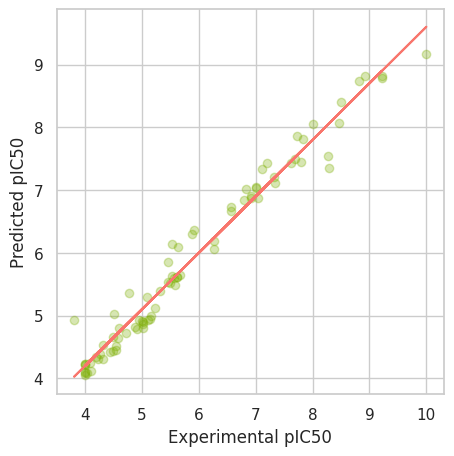

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')
plt.savefig('RFregression_curve.pdf')

In [ ]:
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Chem import rdFingerprintGenerator

def predict_bioactivity(smiles):
    m = Chem.MolFromSmiles(smiles)
    desc = []

    # Calculate atom pair fingerprint using AtomPairGenerator
    fp_generator = rdFingerprintGenerator.GetAtomPairGenerator()
    fp = fp_generator.GetFingerprint(m)
    desc.extend([int(x) for x in fp.ToBitString()])

    # Calculate RDK fingerprint
    fp = Chem.RDKFingerprint(m)
    desc.extend(fp)

    # Calculate additional molecular descriptors
    desc.append(Descriptors.MolWt(m))
    desc.append(Descriptors.MolLogP(m))
    desc.append(rdMolDescriptors.CalcNumHBA(m))
    desc.append(rdMolDescriptors.CalcNumHBD(m))
    desc.append(Descriptors.TPSA(m))
    desc.append(rdMolDescriptors.CalcFractionCSP3(m))
    desc.append(rdMolDescriptors.CalcNumRotatableBonds(m))
    desc.append(rdMolDescriptors.CalcNumAromaticRings(m))
    desc.append(rdMolDescriptors.CalcNumHeterocycles(m))

    return desc

# predict bioactivity of new molecule (Sotorasib)
smiles = "C[C@H]1CN(CCN1C2=NC(=O)N(C3=NC(=C(C=C32)F)C4=C(C=CC=C4F)O)C5=C(C=CN=C5C(C)C)C)C(=O)C=C"
X_new = np.array(predict_bioactivity(smiles)).reshape(1, -1)

# Print the selected features
#print(selected_features)
bioactivity = model.predict(X_new)
print("Predicted bioactivity (pIC50):", bioactivity)

pIC50 = bioactivity
IC50 = (10**-pIC50)*(10**9)
print("IC50:", IC50, "nM")


Predicted bioactivity (pIC50): [6.99512555]
IC50: [101.12870599] nM


# **lazypredict**

In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
! pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.6 MB/s eta 0:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Define and build the LazyRegressor
clf = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_train, predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test, predictions_test = clf.fit(X_train, X_test, y_train, y_test)

 55%|█████▍    | 23/42 [00:43<00:28,  1.49s/it]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 79%|███████▊  | 33/42 [00:49<00:03,  2.36it/s]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 64.


 98%|█████████▊| 41/42 [00:53<00:00,  2.94it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4637
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 1519
[LightGBM] [Info] Start training from score 5.874473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

100%|██████████| 42/42 [00:53<00:00,  1.28s/it]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 57%|█████▋    | 24/42 [00:33<00:17,  1.03it/s]

LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 79%|███████▊  | 33/42 [00:38<00:03,  2.57it/s]

RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 64.


 98%|█████████▊| 41/42 [00:42<00:00,  2.82it/s]

XGBRegressor model failed to execute
'super' object has no attribute '__sklearn_tags__'
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4637
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 1519
[LightGBM] [Info] Start training from score 5.874473
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

100%|██████████| 42/42 [00:43<00:00,  1.03s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
SGDRegressor,121069252809903610789888.00,-7767649521549688757551104.00,4485440244420.55,0.15
Lars,6.22,-333.79,29.45,0.65
KernelRidge,1.21,-12.32,5.87,0.13
PassiveAggressiveRegressor,1.17,-9.95,5.33,0.27
QuantileRegressor,1.02,-0.06,1.65,0.47
DummyRegressor,1.02,0.00,1.61,0.55
LassoLars,1.01,0.33,1.31,0.17
Lasso,1.01,0.33,1.31,0.15
LarsCV,1.01,0.57,1.06,7.87


In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,1357720230633968685285376.00,-346982376441393593880412160.00,24794434935466.69,0.59
SGDRegressor,21539221841617862262784.00,-5504617381898464822034432.00,3122943126884.49,0.16
KernelRidge,1.08,-18.53,5.88,0.12
GaussianProcessRegressor,1.08,-18.50,5.88,0.16
PassiveAggressiveRegressor,1.05,-10.51,4.52,0.25
QuantileRegressor,1.00,-0.07,1.38,0.51
DummyRegressor,1.00,-0.00,1.33,0.09
MLPRegressor,1.00,0.19,1.20,1.61
LassoLars,1.00,0.32,1.10,0.16


[(0.0, 1.0)]

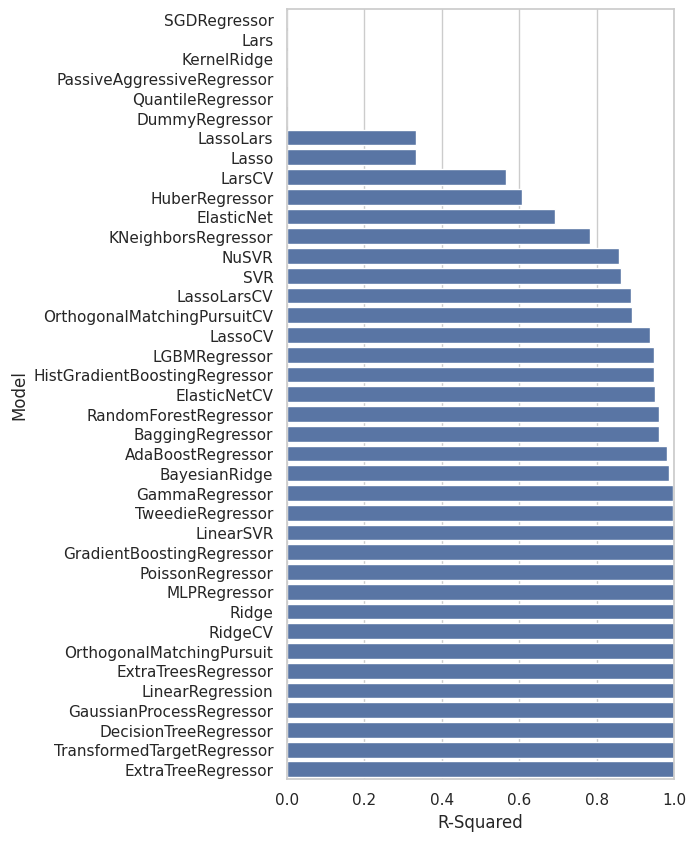

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

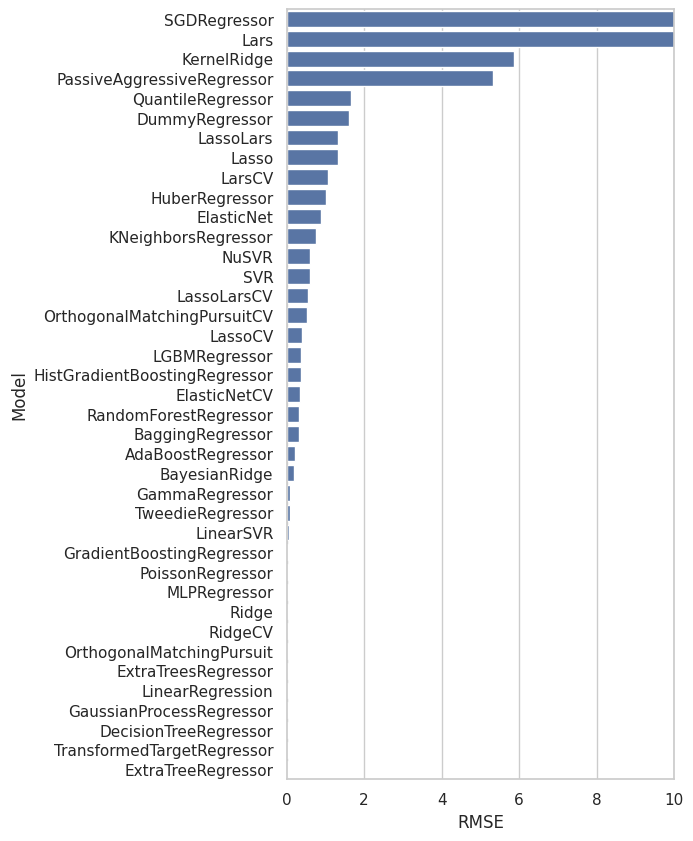

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

# **Artificial Neural Network (ANN) model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

ANN Model
Mean Squared Error: 0.6078164476635388
R^2 Score: 0.6569389324075054



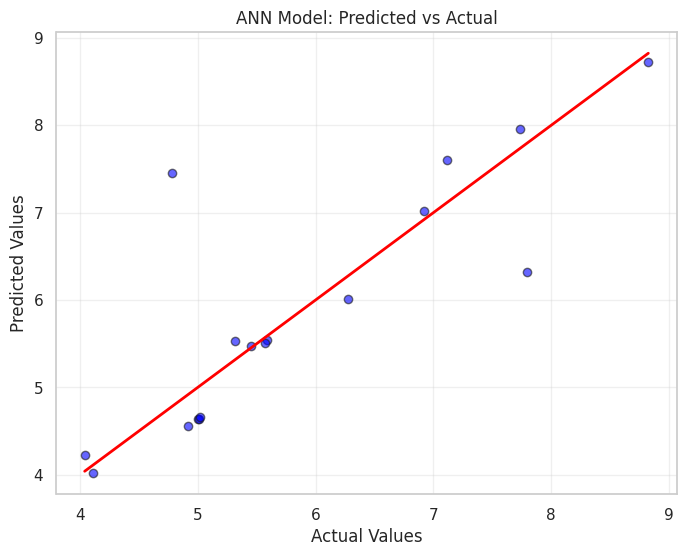

In [ ]:
import numpy as np
np.random.seed(100)

# Train an Artificial Neural Network (ANN) model
ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
print('ANN Model')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_ann)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_ann)}\n')

# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='blue', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Identity line
plt.title('ANN Model: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Chem import rdFingerprintGenerator

def predict_bioactivity(smiles):
    m = Chem.MolFromSmiles(smiles)
    desc = []

    # Calculate atom pair fingerprint using AtomPairGenerator
    fp_generator = rdFingerprintGenerator.GetAtomPairGenerator()
    fp = fp_generator.GetFingerprint(m)
    desc.extend([int(x) for x in fp.ToBitString()])

    # Calculate RDK fingerprint
    fp = Chem.RDKFingerprint(m)
    desc.extend(fp)

    # Calculate additional molecular descriptors
    desc.append(Descriptors.MolWt(m))
    desc.append(Descriptors.MolLogP(m))
    desc.append(rdMolDescriptors.CalcNumHBA(m))
    desc.append(rdMolDescriptors.CalcNumHBD(m))
    desc.append(Descriptors.TPSA(m))
    desc.append(rdMolDescriptors.CalcFractionCSP3(m))
    desc.append(rdMolDescriptors.CalcNumRotatableBonds(m))
    desc.append(rdMolDescriptors.CalcNumAromaticRings(m))
    desc.append(rdMolDescriptors.CalcNumHeterocycles(m))

    return desc

# predict bioactivity of new molecule (Sotorasib)
smiles = "C[C@H]1CN(CCN1C2=NC(=O)N(C3=NC(=C(C=C32)F)C4=C(C=CC=C4F)O)C5=C(C=CN=C5C(C)C)C)C(=O)C=C"
X_new = np.array(predict_bioactivity(smiles)).reshape(1, -1)

# Print the selected features
#print(selected_features)
bioactivity = ann.predict(X_new)
print("Predicted bioactivity (pIC50):", bioactivity)

pIC50 = bioactivity
IC50 = (10**-pIC50)*(10**9)
print("IC50:", IC50, "nM")


Predicted bioactivity (pIC50): [7.81916879]
IC50: [15.16460874] nM


# **Deep Learning model using TensorFlow/Keras**

In [ ]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - loss: 56.7866 - mean_squared_error: 56.7866 - val_loss: 30.3086 - val_mean_squared_error: 30.3086
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 23.7723 - mean_squared_error: 23.7723 - val_loss: 1.4014 - val_mean_squared_error: 1.4014
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.2856 - mean_squared_error: 4.2856 - val_loss: 13.7935 - val_mean_squared_error: 13.7935
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.4538 - mean_squared_error: 15.4538 - val_loss: 2.6399 - val_mean_squared_error: 2.6399
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 3.1450 - mean_squared_error: 3.1450 - val_loss: 4.1949 - val_mean_squared_error: 4.1949
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.0315 - mean_squared_error: 5.0315 - val_loss: 7.1606 - val_mean_squared_error: 7.1606
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 6.2596 - mean_squared_error: 6.2596 - val_loss: 1.2395 

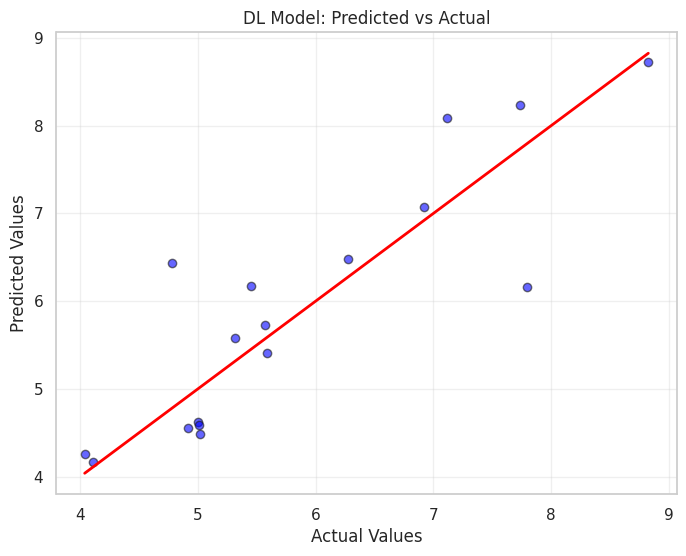

In [ ]:
# Train a Deep Learning model using TensorFlow/Keras
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
y_pred_dl = model.predict(X_test)
print('Deep Learning Model')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_dl)}')
print(f'R^2 Score: {r2_score(y_test, y_pred_dl)}\n')


# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dl, color='blue', alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Identity line
plt.title('DL Model: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Chem import rdFingerprintGenerator

def predict_bioactivity(smiles):
    m = Chem.MolFromSmiles(smiles)
    desc = []

    # Calculate atom pair fingerprint using AtomPairGenerator
    fp_generator = rdFingerprintGenerator.GetAtomPairGenerator()
    fp = fp_generator.GetFingerprint(m)
    desc.extend([int(x) for x in fp.ToBitString()])

    # Calculate RDK fingerprint
    fp = Chem.RDKFingerprint(m)
    desc.extend(fp)

    # Calculate additional molecular descriptors
    desc.append(Descriptors.MolWt(m))
    desc.append(Descriptors.MolLogP(m))
    desc.append(rdMolDescriptors.CalcNumHBA(m))
    desc.append(rdMolDescriptors.CalcNumHBD(m))
    desc.append(Descriptors.TPSA(m))
    desc.append(rdMolDescriptors.CalcFractionCSP3(m))
    desc.append(rdMolDescriptors.CalcNumRotatableBonds(m))
    desc.append(rdMolDescriptors.CalcNumAromaticRings(m))
    desc.append(rdMolDescriptors.CalcNumHeterocycles(m))

    return desc

# predict bioactivity of new molecule (Sotorasib)
smiles = "C[C@H]1CN(CCN1C2=NC(=O)N(C3=NC(=C(C=C32)F)C4=C(C=CC=C4F)O)C5=C(C=CN=C5C(C)C)C)C(=O)C=C"
X_new = np.array(predict_bioactivity(smiles)).reshape(1, -1)

# Print the selected features
#print(selected_features)
bioactivity = model.predict(X_new)
print("Predicted bioactivity (pIC50):", bioactivity)

pIC50 = bioactivity
IC50 = (10**-pIC50)*(10**9)
print("IC50:", IC50, "nM")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted bioactivity (pIC50): [[7.961664]]
IC50: [[10.92284574]] nM
